# Reddit TimeZone

In [1]:
%reload_ext autoreload
%autoreload 2

from DataCollection import DataCollection
from ML import ML
import pandas as pd
import matplotlib.pyplot as plt
import glob
%matplotlib inline 

import numpy as np
import lightgbm as lgb


/anaconda2/envs/reddit_DS_py36/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
path = '/Users/rizki/Documents/Projects/withDeclan/reddit_DS/'
folder = 'savedat/'
dataset = 'ALL_Oct26_Nov4-2018/'

In [3]:
def aggCities(path_to_files):
    allfiles = glob.glob(path_to_files+'/*.csv')
    #print(allfiles)

    df_list = []
    cols = []
    for i,file in enumerate(allfiles):
        if i==0:
            df_temp = pd.read_csv(file)
            col = df_temp.columns.values
        df = pd.read_csv(file,header=0)
        df_list.append(df)

    df_all = pd.DataFrame(columns=cols)
    df_all = pd.concat(df_list)

    cities = df_all['subreddit'].unique()
    long_str_cities = ''
    for c in cities: long_str_cities = '{}_{}'.format(long_str_cities,c)
    
    l = list(df_all.columns.values)
    bins = len([e for e in l if 'bin' in e])

    save_name = path+folder+dataset+'aggregate_{}bins{}.csv'.format(bins,long_str_cities)
    df_all.to_csv(save_name)    
    
    return df_all

df_all = aggCities(path+folder+dataset)
df_all.groupby('subreddit')['bin0'].count()

subreddit
auckland        498
bangkok         499
detroit         499
dublin          497
houston         498
kazakhstan      499
oman            499
pakistan        498
paris           498
riodejaneiro    499
saltlakecity    497
seattle         498
seoul           499
shanghai        497
tasmania        498
venezuela       494
Name: bin0, dtype: int64

In [4]:
df_all.drop(columns='Unnamed: 0',inplace=True)

In [5]:
df_all.tail()

,user,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,...,bin15,bin16,bin17,bin18,bin19,bin20,bin21,bin22,bin23,subreddit
494,Prof_P_Professorson,30.0,32.0,33.0,23.0,7.0,0.0,0.0,0.0,1.0,...,30.0,14.0,14.0,12.0,14.0,16.0,17.0,21.0,20.0,detroit
495,Ridicnonsense,25.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.0,63.0,50.0,29.0,46.0,22.0,6.0,11.0,12.0,detroit
496,Senotonom205,25.0,31.0,46.0,26.0,7.0,7.0,0.0,0.0,0.0,...,20.0,13.0,14.0,20.0,25.0,13.0,34.0,25.0,25.0,detroit
497,flipsideCREATIONS,32.0,40.0,41.0,29.0,34.0,8.0,2.0,0.0,0.0,...,54.0,65.0,42.0,36.0,26.0,19.0,38.0,28.0,34.0,detroit
498,g20t99,13.0,20.0,20.0,25.0,8.0,3.0,0.0,1.0,1.0,...,12.0,8.0,9.0,9.0,7.0,4.0,11.0,6.0,14.0,detroit


In [6]:
df_all.groupby('subreddit').sum()

,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,...,bin14,bin15,bin16,bin17,bin18,bin19,bin20,bin21,bin22,bin23
subreddit,,,,,,,,,,,,,,,,,,,,,
auckland,22312.0,22088.0,21660.0,21713.0,20924.0,19929.0,19877.0,19889.0,20326.0,21501.0,...,4306.0,3191.0,3177.0,4590.0,9508.0,15642.0,20155.0,22589.0,22530.0,22314.0
bangkok,6486.0,7615.0,9329.0,10507.0,10895.0,10826.0,10985.0,10254.0,10207.0,9852.0,...,11422.0,11526.0,10763.0,9279.0,7905.0,6809.0,5951.0,5552.0,4863.0,5586.0
detroit,20151.0,21662.0,22476.0,20251.0,16345.0,11928.0,7964.0,5211.0,3729.0,2885.0,...,23783.0,26243.0,27746.0,27916.0,27386.0,27384.0,26030.0,22290.0,19649.0,19459.0
dublin,14048.0,9801.0,6432.0,4817.0,3496.0,3364.0,5033.0,8279.0,13255.0,16315.0,...,21947.0,22681.0,21816.0,20823.0,20450.0,20884.0,21476.0,22195.0,22056.0,19387.0
houston,21570.0,22581.0,25257.0,23421.0,19686.0,14797.0,10440.0,6689.0,4550.0,3016.0,...,26973.0,31447.0,33408.0,32010.0,33076.0,32642.0,32220.0,30783.0,25803.0,21899.0
kazakhstan,2568.0,2546.0,2661.0,2932.0,3113.0,3063.0,2814.0,2853.0,2804.0,2477.0,...,4148.0,4157.0,4182.0,4269.0,4132.0,4088.0,4147.0,3737.0,3006.0,2604.0
oman,2591.0,2549.0,2824.0,3132.0,3408.0,3888.0,3918.0,3907.0,3806.0,4011.0,...,4916.0,5260.0,5076.0,5192.0,5239.0,5068.0,4400.0,3960.0,3473.0,3033.0
pakistan,12024.0,11556.0,12114.0,13301.0,14517.0,14954.0,15639.0,15351.0,14038.0,14231.0,...,20786.0,22909.0,23811.0,24051.0,24003.0,22666.0,20619.0,18027.0,15621.0,13704.0
paris,10253.0,7875.0,6766.0,5981.0,5530.0,6047.0,8395.0,11213.0,14244.0,16012.0,...,19160.0,19859.0,19271.0,17926.0,17311.0,17075.0,17413.0,17327.0,15927.0,12799.0


['/Users/rizki/Documents/Projects/withDeclan/reddit_DS/savedat/ALL_Oct26_Nov4-2018/aggregate_24bins_dublin_oman_seoul_kazakhstan_riodejaneiro_auckland_houston_saltlakecity_shanghai_tasmania_pakistan_seattle_venezuela_paris_bangkok_detroit.csv']


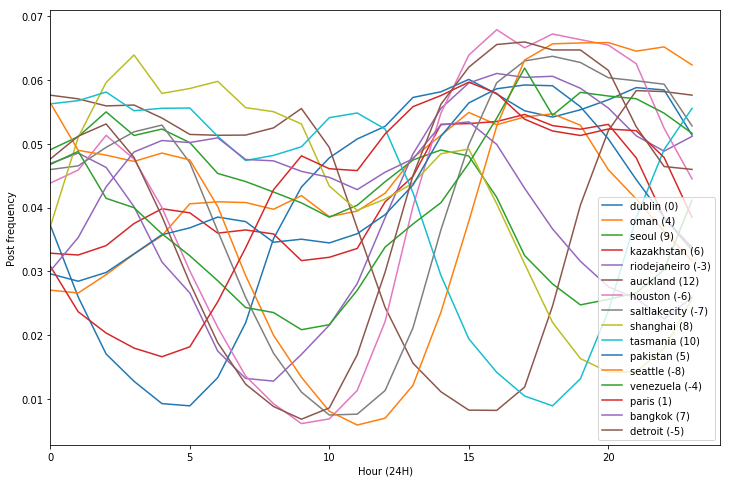

In [7]:
# ML: Boosted decision tree ( lightgbm )

ml = ML(path+folder+dataset)

ml.postAvgTimesByRegion()

In [8]:
# ml.addTzCol()
# train_df = ml.getData()
# train_df = train_df.drop(columns=['Unnamed: 0.1','user','subreddit'])
# train_df

In [9]:
# from sklearn.model_selection import KFold
# kf = KFold(5,shuffle=True,random_state=1234)

# models = []
# for tr_ind,val_ind in kf.split(train_df):
#     df_tr, df_val = train_df.iloc[tr_ind,:],train_df.iloc[val_ind,:]
#     x_tr = df_tr.drop(columns=['tz'])
#     x_val = df_val.drop(columns=['tz'])
#     y_tr = df_tr['tz']
#     y_val = df_val['tz']
#     lgb_model = ml.run_lightgbm(x_tr,x_val,y_tr,y_val)
#     models.append(lgb_model)

In [10]:
# lgb_model = models[3]

In [11]:
x_tr,x_val,y_tr,y_val = ml.trainTestSplit()

x_tr = x_tr.drop(columns=['Unnamed: 0.1'])
x_val = x_val.drop(columns=['Unnamed: 0.1'])


Training until validation scores don't improve for 100 rounds.
[100]	train's custom diff error: 2.70143	eval's custom diff error: 3.00676
[200]	train's custom diff error: 2.39788	eval's custom diff error: 2.92537
[300]	train's custom diff error: 2.20894	eval's custom diff error: 2.9111
[400]	train's custom diff error: 2.0552	eval's custom diff error: 2.90196
Early stopping, best iteration is:
[395]	train's custom diff error: 2.0612	eval's custom diff error: 2.90074
Plot metrics recorded during training...
Plot feature importances...


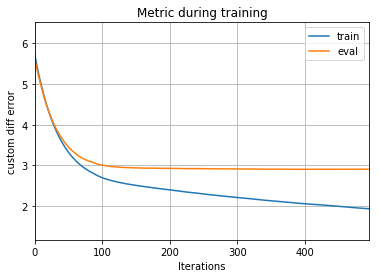

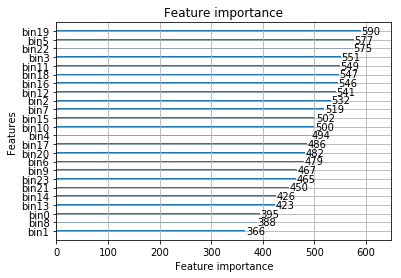

In [12]:
lgb_model = ml.run_lightgbm(x_tr,x_val,y_tr,y_val)

In [13]:
y_tr_pred = lgb_model.predict(x_tr)
y_val_pred = lgb_model.predict(x_val)

In [14]:

def approx_accuracy(y,ypred):    
    #calculating how many predictions got exactly the right zone, after rounding.
    rounded_err = np.round(y) - np.round(ypred)
    approx_accuracy = list(rounded_err).count(0.0) / len(rounded_err)        

    print(approx_accuracy)

    return approx_accuracy


In [15]:
acc_tr = approx_accuracy(y_tr,y_tr_pred)

0.20839311334289815


In [16]:
acc_val = approx_accuracy(y_val,y_val_pred)

0.1329987452948557


In [17]:
def plot_y_ypred(y_tr_true,y_tr_pred,y_test_true,y_test_pred):
#         y_tr_pred = y_tr_pred_tensor.squeeze().detach().numpy()
#         y_tr_true = y_tr_tensor.squeeze().detach().numpy()
#         y_test_pred = y_test_pred_tensor.squeeze().detach().numpy()
#         y_test_true = y_test_tensor.squeeze().detach().numpy()

        fig, axes = plt.subplots(1, 2, figsize=(16,8))
        ax_train = axes[0]
        ax_test = axes[1]

        df_tr = pd.DataFrame({'true':y_tr_true, 'pred':y_tr_pred})
        df_test = pd.DataFrame({'true':y_test_true, 'pred':y_test_pred})

        mean_tr = df_tr.groupby(['true']).mean()
        tr_bins = mean_tr.index.values
        mean_tr_pred = mean_tr.values[:,0]

        mean_test = df_test.groupby(['true']).mean()
        test_bins = mean_test.index.values
        mean_test_pred = mean_test.values[:,0]

        ideal = np.arange(-12, 13, 1)
        ax_train.plot(y_tr_true, y_tr_pred, color='tomato', marker='+', linestyle='None')
        ax_train.plot(ideal, ideal, color='lightgray', label='ideal')
        ax_train.plot(tr_bins, mean_tr_pred, color='black', marker='+', markersize=15, linestyle='dashed', label='bin avg')
        ax_train.set_xlabel('true train y values (time zone)')
        ax_train.set_ylabel('pred train y values (time zone)')
        ax_train.set_xlim((-13,13))
        ax_train.legend()

        ax_test.plot(y_test_true, y_test_pred, color='cornflowerblue', marker='+', linestyle='None')
        ax_test.plot(ideal, ideal, color='lightgray', label='ideal')
        ax_test.plot(test_bins, mean_test_pred, color='black', marker='+', markersize=15, linestyle='dashed', label='bin avg')
        ax_test.set_xlabel('true test y values (time zone)')
        ax_test.set_ylabel('pred test y values (time zone)')
        ax_test.set_xlim((-13,13))
        ax_test.legend()


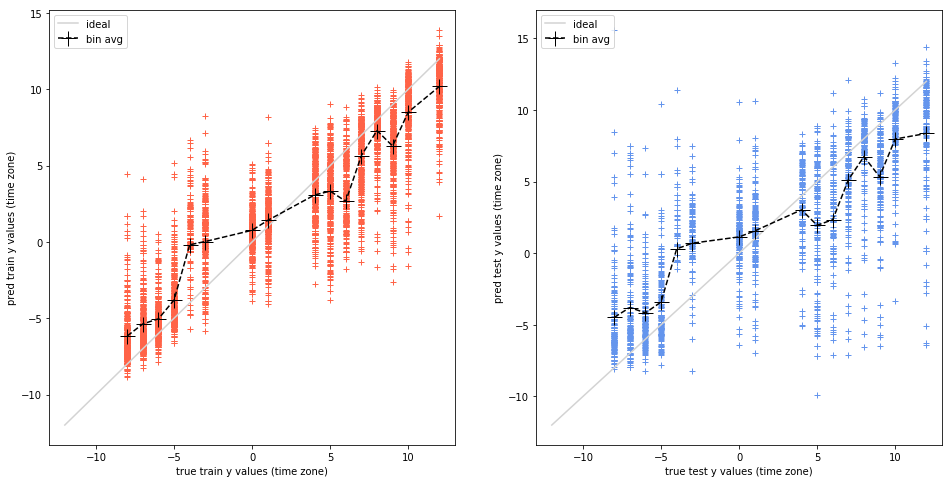

In [18]:
plot_y_ypred(y_tr,y_tr_pred,y_val,y_val_pred)